In [1]:
!pip install -q -U autogluon.tabular

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aiobotocore 2.12.3 requires botocore<1.34.70,>=1.34.41, but you have botocore 1.29.165 which is incompatible.
spopt 0.6.0 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.


In [2]:
from autogluon.tabular import TabularPredictor,TabularDataset
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import shutil

warnings.filterwarnings('ignore')
seed = 27

# Loading the Dataset

In [3]:
train = pd.read_csv('/kaggle/input/flood-prediction-precomputed-stat-features/train.csv', index_col='id')

In [4]:
feats_to_drop = [
    '_sort_6', '_cnt17', 'Deforestation', 'Watersheds', '_std', '_cnt1', '_cnt12', 
    '_cnt16', '_cnt8', '_sort_9', 'RiverManagement', 'Encroachments', '_30th', '_10th', 
    '_min', 'DrainageSystems', '_sort_7', '_40th', '_sort_5', 'PoliticalFactors', 
    'ClimateChange', '_mode', 'Landslides', 'TopographyDrainage', 'PopulationScore',
    'CoastalVulnerability', '_sort_4', '_sort_1', 'AgriculturalPractices', '_25th', '_sort_0',
    '_sort_11', 'MonsoonIntensity', '_cnt7', '_sort_16', '_sort_13', '_sort_8',
    '_cnt18', '_sort_10', '_cnt0'
]
train = train.drop(columns=feats_to_drop)

In [5]:
_train, _val = train_test_split(
    train, 
    test_size=0.1, 
    random_state=seed
)

del train

In [6]:
_train = TabularDataset(_train)
_val = TabularDataset(_val)

# Training

In [7]:
predictor = TabularPredictor(
    label='FloodProbability',
    eval_metric='r2',
    problem_type="regression",
    verbosity=2
).fit(
    train_data=_train,
    time_limit=3600 * 10,
    presets="best_quality",
    excluded_model_types = ["NN_TORCH", "FASTAI", "NN"],
    keep_only_best=True,
    hyperparameter_tune_kwargs={  
        'num_trials': 50,
        'scheduler' : 'local',
        'searcher'  : 'auto'
    },
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240519_193108"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 36000 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240519_193108/ds_sub_fit/sub_fit_ho.
2024-05-19 19:31:10,040	INFO util.py:124 -- Outdated packages:
  ipywidgets==

  0%|          | 0/50 [00:00<?, ?it/s]

Will use sequential fold fitting strategy because import of ray failed. Reason: ray==2.9.0 detected. 2.10.0 <= ray < 2.11.0 is required. You can use pip to install certain version of ray `pip install ray==2.10.0` 
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 22. Best iteration is:
	[21]	valid_set's l2: 0.000679716	valid_set's r2: -80.71
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 17. Best iteration is:
	[17]	valid_set's l2: 0.000595586	valid_set's r2: -80.6871
	Ran out of time, early stopping on iteration 18. Best iteration is:
	[18]	valid_set's l2: 0.000563218	valid_set's r2: -81.6782
	Ran out of time, early stopping on iteration 17. Best iteration is:
	[17]	valid_set's l2: 0.000591517	valid_set's r2: -81.0958
	Ran out of time, early stopping on iteration 17. Best iteration is:
	[17]	valid_set's l2: 0.0005941

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 18. Best iteration is:
	[12]	valid_set's l2: 0.00101341	valid_set's r2: -80.6525
	Ran out of time, early stopping on iteration 19. Best iteration is:
	[11]	valid_set's l2: 0.00107526	valid_set's r2: -81.5829
	Ran out of time, early stopping on iteration 19. Best iteration is:
	[11]	valid_set's l2: 0.00107958	valid_set's r2: -81.0527
	Ran out of time, early stopping on iteration 20. Best iteration is:
	[11]	valid_set's l2: 0.00108189	valid_set's r2: -80.7847
	Ran out of time, early stopping on iteration 21. Best iteration is:
	[11]	valid_set's l2: 0.00107831	valid_set's r2: -81.2557
	Ran out of time, early stopping on iteration 22. Best iteration is:
	[11]	valid_set's l2: 0.00107929	valid_set's r2: -81.1828
	Ran out of time, early stopping on iteration 24. Best iteration is:
	[11]	valid_set's l2: 0.00106916	valid_set's r2: -82.0156
	Ran out of time, early

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 24.
	Ran out of time, early stopping on iteration 28.
	Ran out of time, early stopping on iteration 29.
	Ran out of time, early stopping on iteration 31.
	Ran out of time, early stopping on iteration 31.
	Ran out of time, early stopping on iteration 33.
	Ran out of time, early stopping on iteration 38.
	Ran out of time, early stopping on iteration 46.
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L1/T1 ...
	0.8199	 = Validation score   (r2)
	76.13s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L1 ... Tuning model for up to 84.31s of the 8717.68s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
No model was trained during hyperparameter tuning XGBoost_BAG_L1... Skipping this model.
Fitting model: LightGBMLarge_BAG_L1 ... Training model for up to 84.31s of the 8625.12s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with Sequenti

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00239266	valid_set's r2: -91.4299
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00230878	valid_set's r2: -88.8998
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00239298	valid_set's r2: -91.4299
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00258197	valid_set's r2: -94.0909
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iterat

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00238857	valid_set's r2: -90.6446
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.0023033	valid_set's r2: -89.3985
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00238882	valid_set's r2: -90.6446
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00258146	valid_set's r2: -94.0909
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iterati

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 21.
	Ran out of time, early stopping on iteration 29.
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L2/T1 ...
	0.257	 = Validation score   (r2)
	59.37s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L2 ... Tuning model for up to 68.17s of the 4383.49s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/autogl

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
No model was trained during hyperparameter tuning XGBoost_BAG_L2... Skipping this model.
Fitting model: LightGBMLarge_BAG_L2 ... Training model for up to 68.17s of the 4288.06s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00247533	valid_set's r2: -94.012
	Time limit exceeded... Skipping LightGBMLarge_BAG_L2.
Hyperparameter tuning model: CatBoost_r177_BAG_L2 ... Tuning model for up to 68.17s of the 4274.95s of remaining time.
	No hyperparameter search space specified for CatBoost_r177_BAG_L2. Skipping HPO. Will train one model based on the

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 104. Best iteration is:
	[103]	valid_set's l2: 0.000354315	valid_set's r2: -81.2789
	Ran out of time, early stopping on iteration 109. Best iteration is:
	[108]	valid_set's l2: 0.000355808	valid_set's r2: -81.0198
	Ran out of time, early stopping on iteration 113. Best iteration is:
	[109]	valid_set's l2: 0.000357922	valid_set's r2: -81.7933
	Ran out of time, early stopping on iteration 118. Best iteration is:
	[117]	valid_set's l2: 0.000351647	valid_set's r2: -81.6244
	Ran out of time, early stopping on iteration 110. Best iteration is:
	[109]	valid_set's l2: 0.000356481	valid_set's r2: -80.9661
	Ran out of time, early stopping on iteration 124. Best iteration is:
	[121]	valid_set's l2: 0.000352723	valid_set's r2: -81.457
	Ran out of time, early stopping on iteration 140. Best iteration is:
	[137]	valid_set's l2: 0.000354222	valid_set's r2: -81.0126
	Ra

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L1/T1 ...
	0.5859	 = Validation score   (r2)
	113.92s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T2 ...
	0.5963	 = Validation score   (r2)
	112.38s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: RandomForestMSE_BAG_L1 ... Tuning model for up to 267.12s of the 28005.76s of remaining time.
	No hyperparameter search space specified for RandomForestMSE_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/ensemble/bagged_ensemble_model.py", line 1334, in _hyperparameter_tune
    hpo_executor.validate_search_space(search_space, self.name)
  File "/opt/con

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 102.
	Ran out of time, early stopping on iteration 107.
	Ran out of time, early stopping on iteration 111.
	Ran out of time, early stopping on iteration 116.
	Ran out of time, early stopping on iteration 122.
	Ran out of time, early stopping on iteration 132.
	Ran out of time, early stopping on iteration 143.
	Ran out of time, early stopping on iteration 175.
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L1/T1 ...
	0.8666	 = Validation score   (r2)
	251.02s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L1 ... Tuning model for up to 267.12s of the 27718.2s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
Fitted model: ExtraTreesMSE_BAG_L1 ...
	0.8676	 = Validation score   (r2

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L1/T1 ...
	0.8679	 = Validation score   (r2)
	252.5s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: LightGBMLarge_BAG_L1 ... Training model for up to 267.12s of the 27189.32s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	0.6176	 = Validation score   (r2)
	162.92s	 = Training   runtime
	1.39s	 = Validation runtime
Hyperparameter tuning model: CatBoost_r177_BAG_L1 ... Tuning model for up to 267.12s of the 27023.52s of remaining time.
	No hyperparameter search space specified for CatBoost_r177_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
	Fitting 5 child models (S1F1 - S1F5) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 198.
	Ran out of time, early stopping on iteration 210.

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 29. Best iteration is:
	[29]	valid_set's l2: 0.00046953	valid_set's r2: -81.0591
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 22. Best iteration is:
	[18]	valid_set's l2: 0.000520627	valid_set's r2: -81.0573
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 16. Best iteration is:
	[16]	valid_set's l2: 0.000801112	valid_set's r2: -81.1242
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 10. Best iteration is:
	[10]	valid_set's l2: 0.00235062	valid_set's r2: -89.8717
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 5. B

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 17. Best iteration is:
	[11]	valid_set's l2: 0.00107666	valid_set's r2: -81.0576
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 12. Best iteration is:
	[9]	valid_set's l2: 0.000956417	valid_set's r2: -81.0576
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 8. Best iteration is:
	[8]	valid_set's l2: 0.001342	valid_set's r2: -81.3222
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 5. Best iteration is:
	[5]	valid_set's l2: 0.00247377	valid_set's r2: -93.9047
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 2. Best iter

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 31.
	Ran out of time, early stopping on iteration 32.
	Ran out of time, early stopping on iteration 33.
	Ran out of time, early stopping on iteration 34.
	Ran out of time, early stopping on iteration 35.
	Ran out of time, early stopping on iteration 37.
	Ran out of time, early stopping on iteration 41.
	Ran out of time, early stopping on iteration 48.
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L2/T1 ...
	0.8384	 = Validation score   (r2)
	201.79s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L2 ... Tuning model for up to 213.64s of the 13876.74s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packa

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
No model was trained during hyperparameter tuning XGBoost_BAG_L2... Skipping this model.
Fitting model: LightGBMLarge_BAG_L2 ... Training model for up to 213.64s of the 13623.08s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 17. Best iter

In [8]:
X_train = _train.drop('FloodProbability', axis=1)
y_train = _train['FloodProbability']

y_preds = predictor.predict(X_train)

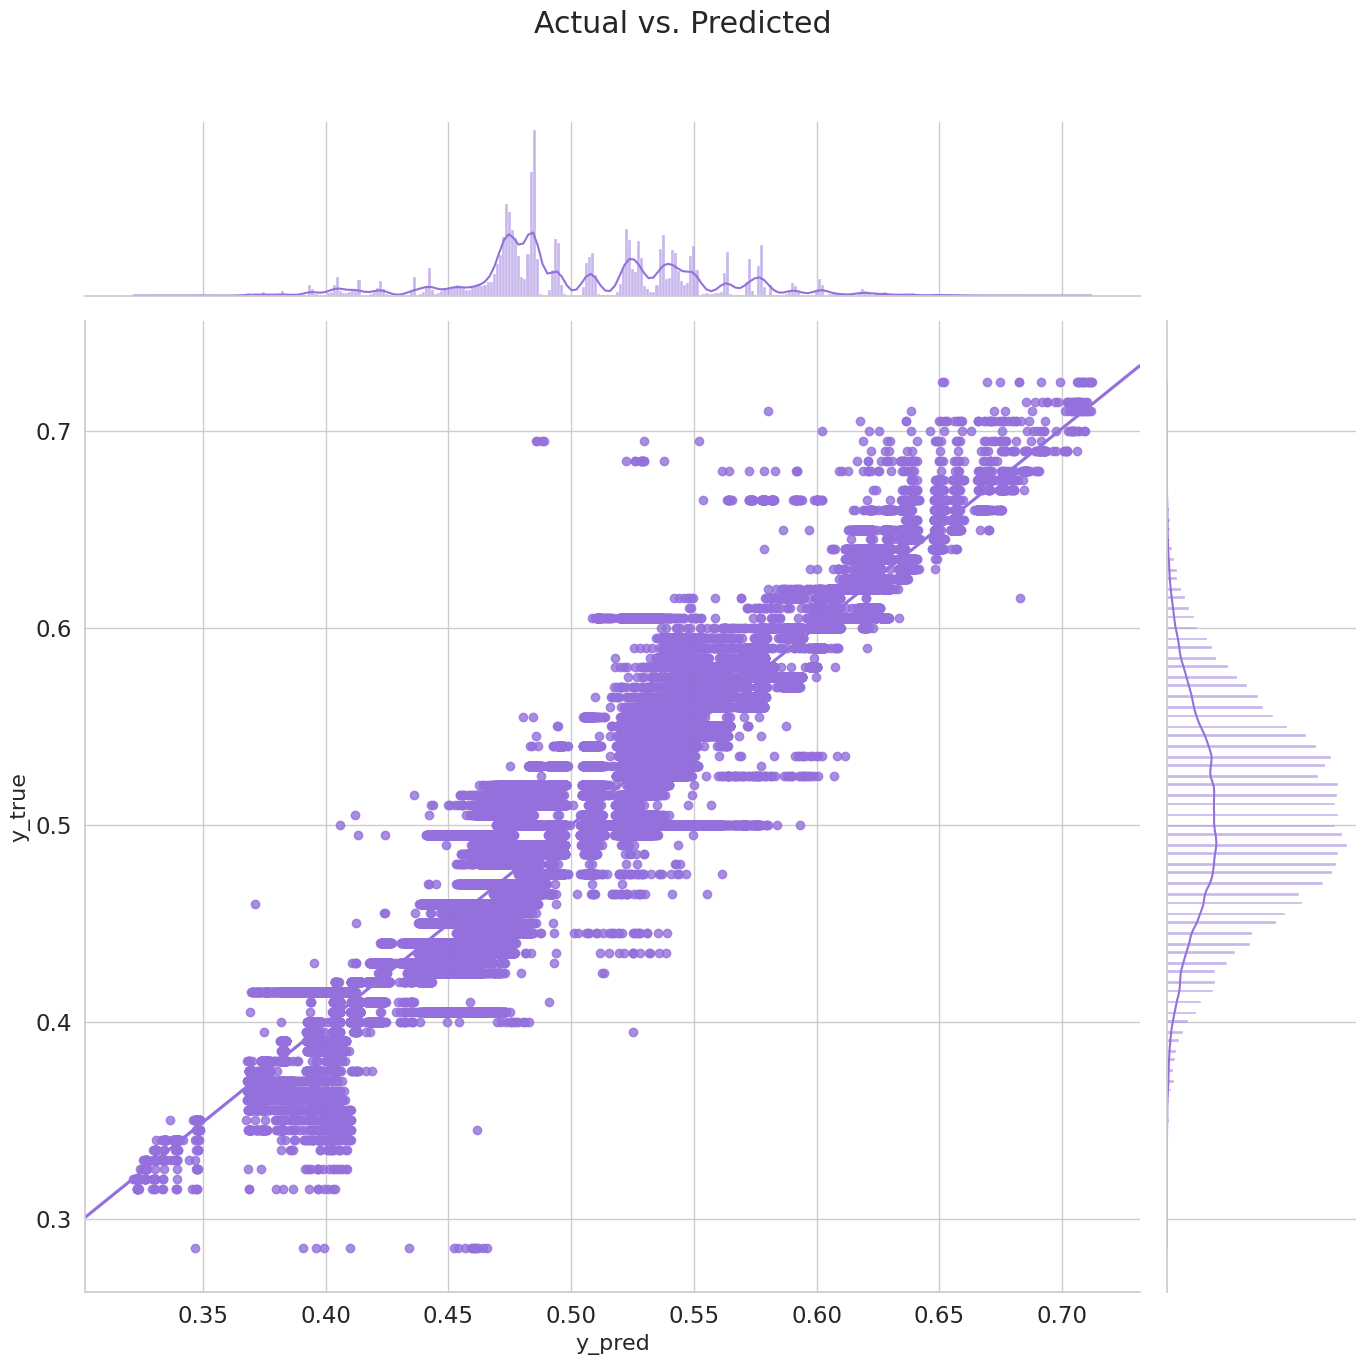

In [9]:
sns.set(style="whitegrid", font_scale=1.5)
g = sns.jointplot(
    x=y_preds,
    y=y_train,
    kind="reg",
    truncate=False,
    color='#9370DB',
    height=14,
)
g.set_axis_labels('y_pred', 'y_true', fontsize=16)
g.fig.suptitle("Actual vs. Predicted")
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.9)

# Visualizing the Results

In [10]:
score = predictor.evaluate(_val, silent=True)['r2']

In [11]:
print(f"Validation R2 Score: {score}")

Validation R2 Score: 0.8694148534424759


In [12]:
fi = predictor.feature_importance(data=_val, silent=True)
lb = predictor.leaderboard(_val, silent=True)

These features in provided data are not utilized by the predictor and will be ignored: ['_sort_19', '_50th', '_cnt22']


In [13]:
lb.style.background_gradient(subset=['score_val', 'score_test'], cmap='RdYlGn')

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,0.869415,0.869251,r2,111.164262,1.653897,12697.636342,0.009746,0.020668,7.950324,3,True,56
1,XGBoost_r194_BAG_L1,0.869277,0.869111,r2,1.045504,0.004271,201.151054,1.045504,0.004271,201.151054,1,True,19
2,CatBoost_r6_BAG_L2,0.869150,0.868907,r2,110.272176,1.628827,12484.130162,0.866794,0.004481,204.880824,2,True,55
3,XGBoost_r194_BAG_L2,0.868980,0.868562,r2,110.287722,1.628748,12484.805194,0.882340,0.004402,205.555855,2,True,54
4,CatBoost_r180_BAG_L1,0.868714,0.868691,r2,1.180456,0.004222,252.171913,1.180456,0.004222,252.171913,1,True,46
5,ExtraTrees_r4_BAG_L1,0.868694,0.868189,r2,1.102203,0.003249,280.053840,1.102203,0.003249,280.053840,1,True,35
6,RandomForest_r34_BAG_L1,0.868677,0.867826,r2,0.625174,0.004313,282.012336,0.625174,0.004313,282.012336,1,True,32
7,ExtraTrees_r172_BAG_L1,0.868636,0.867848,r2,0.844408,0.003407,268.255748,0.844408,0.003407,268.255748,1,True,20
8,CatBoost_r167_BAG_L1,0.868555,0.868532,r2,0.322803,0.004472,252.316536,0.322803,0.004472,252.316536,1,True,26
9,CatBoost_r163_BAG_L1,0.868538,0.868505,r2,0.316175,0.004483,252.181936,0.316175,0.004483,252.181936,1,True,49


In [14]:
fi.style.background_gradient(cmap='RdYlGn')

,importance,stddev,p_value,n,p99_high,p99_low
_sum,0.733467,0.006690,0.000000,5,0.747242,0.719693
_sum_log,0.047520,0.000620,0.000000,5,0.048796,0.046244
_mean,0.026136,0.000556,0.000000,5,0.027281,0.024990
_entropy,0.003455,0.000310,0.000008,5,0.004093,0.002817
_max,0.000948,0.000239,0.000448,5,0.001440,0.000455
_special1,0.000909,0.000188,0.000207,5,0.001295,0.000522
_2nd_moment,0.000470,0.000123,0.000509,5,0.000723,0.000218
_cnt15,0.000385,0.000170,0.003556,5,0.000735,0.000036
_gmean,0.000337,0.000202,0.010148,5,0.000754,-0.000079
_3rd_moment,0.000289,0.000204,0.016931,5,0.000708,-0.000131


# Making Predictions and Creating a Submission File

In [15]:
test = pd.read_csv('/kaggle/input/flood-prediction-precomputed-stat-features/test.csv', index_col='id')
test = test.drop(columns=feats_to_drop)
test = TabularDataset(test)

preds = predictor.predict(test)

In [16]:
submission = pd.DataFrame({'id': test.index, 'FloodProbability ': preds})
submission.to_csv(f'autogluon-{score:.6f}.csv', index=False)
submission.head()

,id,FloodProbability
id,,
1117957,1117957,0.578172
1117958,1117958,0.457011
1117959,1117959,0.447256
1117960,1117960,0.467255
1117961,1117961,0.467396


In [17]:
shutil.rmtree("AutogluonModels")